## Decision Tree Assignment:


### **Problem Statement:**

A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

**Approach -** A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

# 1. Importing Libraries:

In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import plot as off


from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from dataprep.eda import plot, plot_correlation, plot_missing, create_report

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data / Dataset:

In [5]:
com_data = pd.read_csv('Company_data.csv')
com_data

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

**Let’s consider a Company dataset with around 10 variables and 400 records. The attributes are as follows:**

1. Sales -- Unit sales (in thousands) at each location
2. Competitor Price -- Price charged by competitor at each location
3. Income -- Community income level (in thousands of dollars)
4. Advertising -- Local advertising budget for company at each location (in thousands of dollars)
5. Population -- Population size in region (in thousands)
6. Price -- Price company charges for car seats at each site
7. Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
8. Age -- Average age of the local population
9. Education -- Education level at each location
10. Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
11. US -- A factor with levels No and Yes to indicate whether the store is in the US or not

# 3. Data Understanding / Exploration / EDA:

## 3.1 Descriptive Analysis:

In [6]:
com_data.shape

(400, 11)

In [7]:
com_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
com_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [9]:
com_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [10]:
com_data[com_data.duplicated()].shape

(0, 11)

In [12]:
com_data[com_data.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

In [13]:
com_data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

1. It is obsevred that the features are not on the same scale. 
2. For example, Population has a mean of **264.84** and Advertising has a mean value of **6.63.**
3. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. 

## 3.2 Feature Engineering:

In [14]:
com_data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

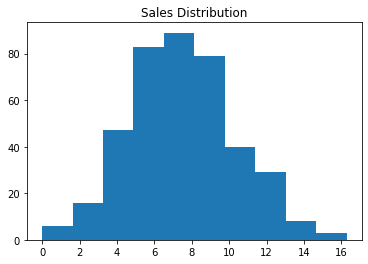

In [15]:
plt.hist('Sales',data=com_data)
plt.title('Sales Distribution')
plt.show()

As we can see that sales distribution is not skewed and it is found normal distribution (ND), so we can take mean or median as a threshold to make two or three categories 'Low', 'Medium' and 'High' Sales.

For two categories lets assume: Sales < 7.5 as “Bad=0” and Sales > 7.5 as “Good=1”

For three categories lets divide the Sales values with Quartiles;

1. Less than First quartile as 'Low' , 
2. Between Second Quartile as 'Medium and 
3. Above Third Quartile as 'High'

In [17]:
com_data.Sales.max()

16.27

In [19]:
16.27/3

5.423333333333333

In [20]:
5.423333333333333*2

10.846666666666666

In [21]:
5.423333333333333*3

16.27

In [22]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good":

com_data_1=com_data.copy()
com_data_1['Sales_cat'] = pd.cut(x = com_data_1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
com_data_1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      High  
1         10   Yes  Yes      High  
2         12   Yes  Yes      High  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [23]:
com_data_1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

In [24]:
com_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [25]:
categorical_features = com_data_1.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [29]:
categorical_features.shape

(4,)

In [26]:
numerical_features = com_data_1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [30]:
numerical_features.shape

(8,)

# 4. Data Visualization:

### Univariate plots:

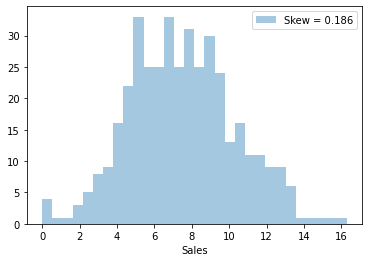

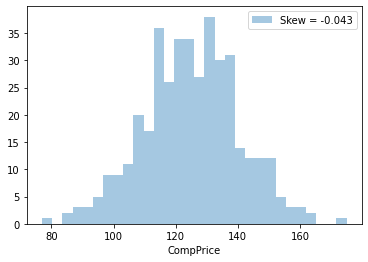

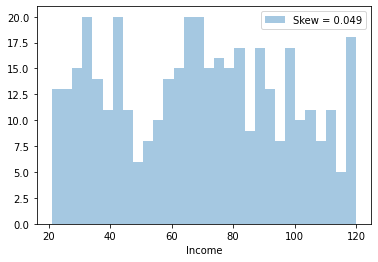

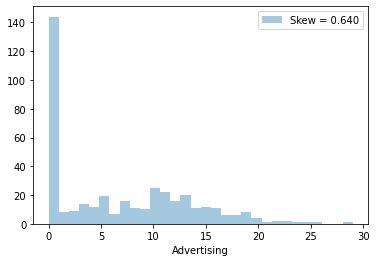

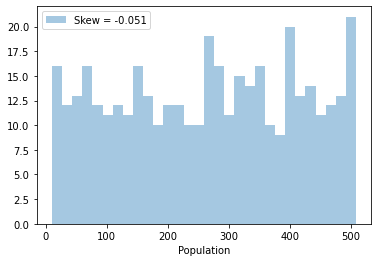

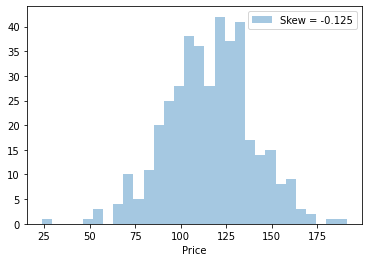

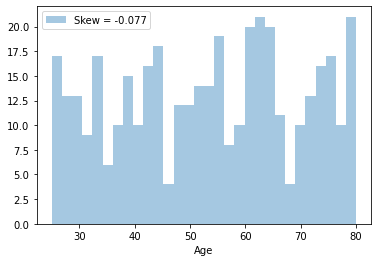

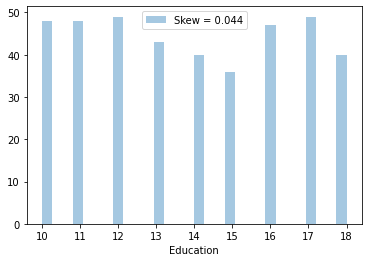

In [31]:
numerical_features=[feature for feature in com_data.columns if com_data[feature].dtypes != 'O']

for feat in numerical_features:
    skew = com_data[feat].skew()
    sns.distplot(com_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [33]:
# Detect observations with more than one outlier

def outlier_hunt(com_data):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
# Iterate over features(columns):
    for col in com_data.columns.tolist():
        
        # 1st quartile (25%):
        Q1 = np.percentile(com_data[col], 25)
        
        # 3rd quartile (75%):
        Q3 = np.percentile(com_data[col],75)
        
        # Interquartile rrange (IQR):
        IQR = Q3 - Q1
        
        # Outlier step:
        outlier_step = 1.5 * IQR
        
# Determine a list of indices of outliers for feature col:
        outlier_list_col = com_data[(com_data[col] < Q1 - outlier_step) | (com_data[col] > Q3 + outlier_step )].index
        
# Append the found outlier indices for col to the list of outlier indices: 
        outlier_indices.extend(outlier_list_col)
        
# Select observations containing more than 2 outliers:
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(com_data[numerical_features])))) 


The dataset contains 0 observations with more than 2 outliers


#### We can see that no observations with multiple outliers found. We will examine the boxplots for the several distributions

### boxplots:

In [34]:
numerical_features

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

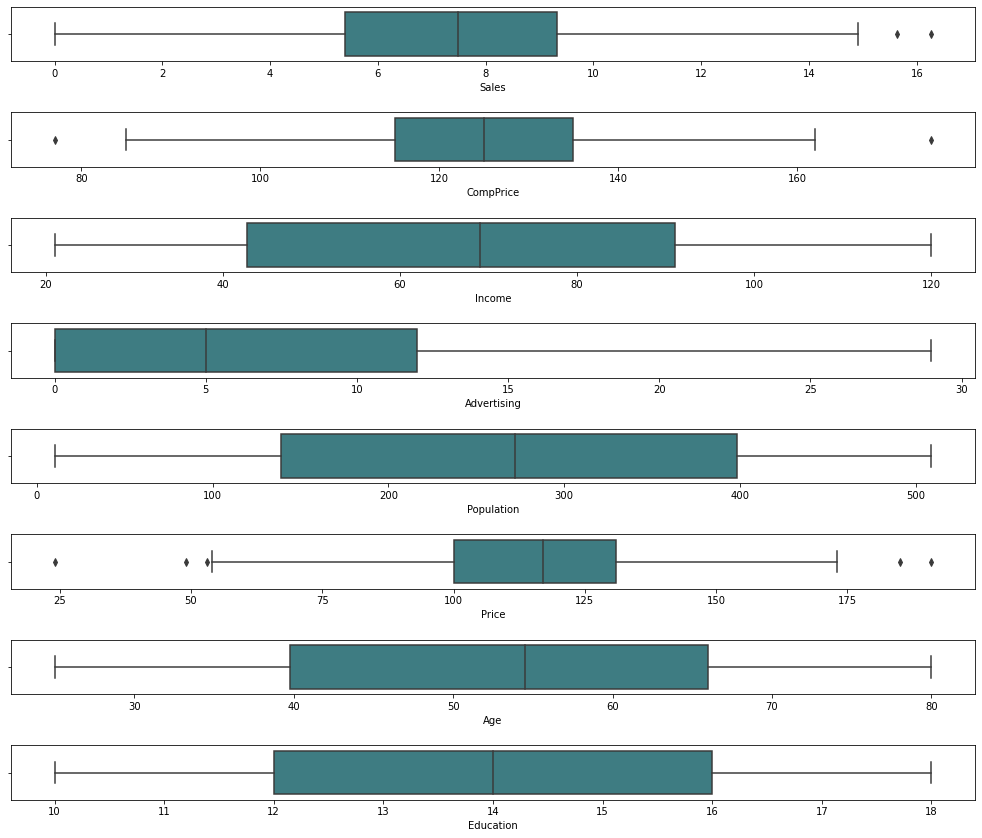

In [35]:
outliers=com_data.copy() 
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=outliers,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=outliers,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=outliers,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=outliers,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=outliers,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=outliers,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=outliers,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=outliers,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)
plt.show()

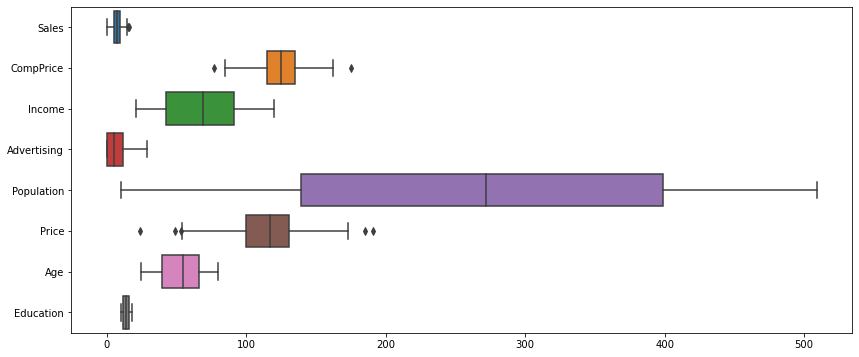

In [36]:
# Outliers:

plt.figure(figsize=(14,6))
sns.boxplot(data=com_data[numerical_features], orient="h")
plt.show()

#### Population has a mean that is much superior to other constituents.

### Multivariate Analysis:

<Figure size 576x576 with 0 Axes>

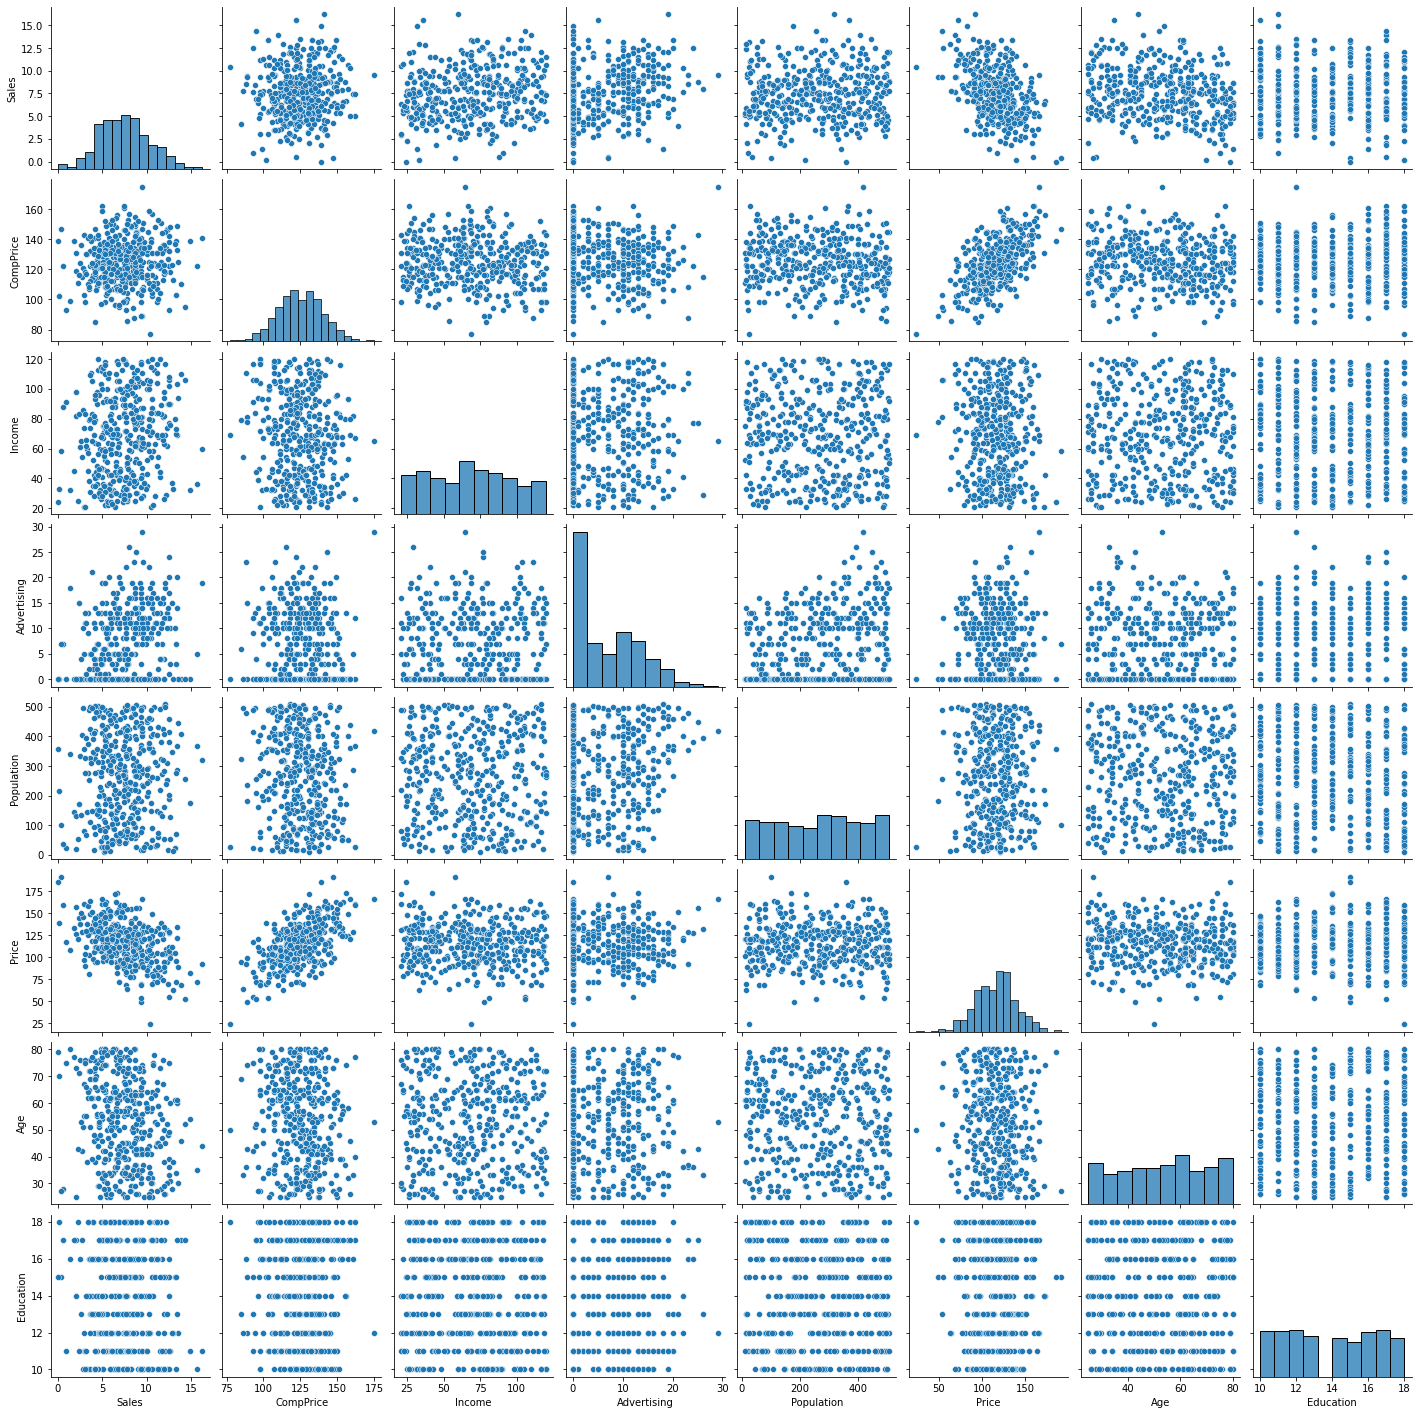

In [37]:
plt.figure(figsize=(8,8))
sns.pairplot(com_data, palette='coolwarm')
plt.show()

In [40]:
from sklearn.tree import plot_tree

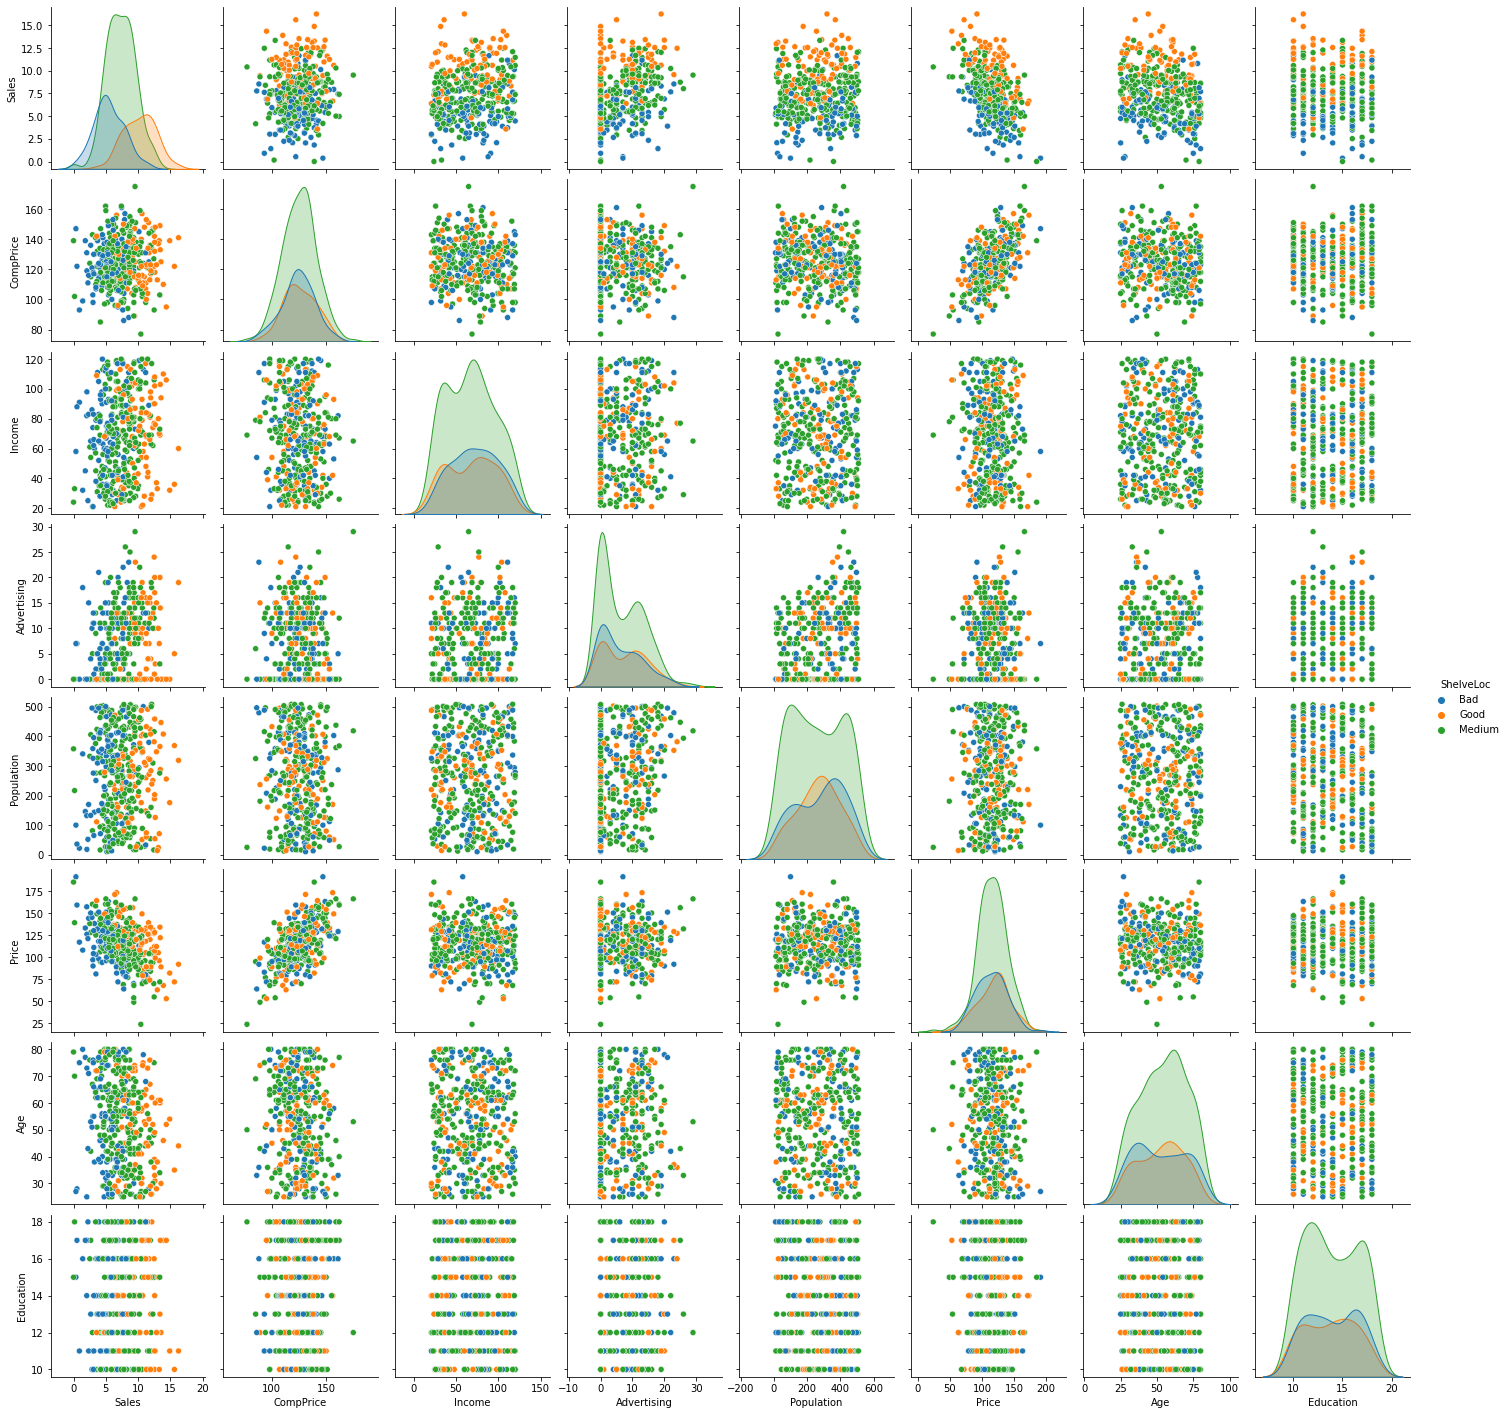

In [42]:
sns.pairplot(com_data, hue = 'ShelveLoc')
plt.show()

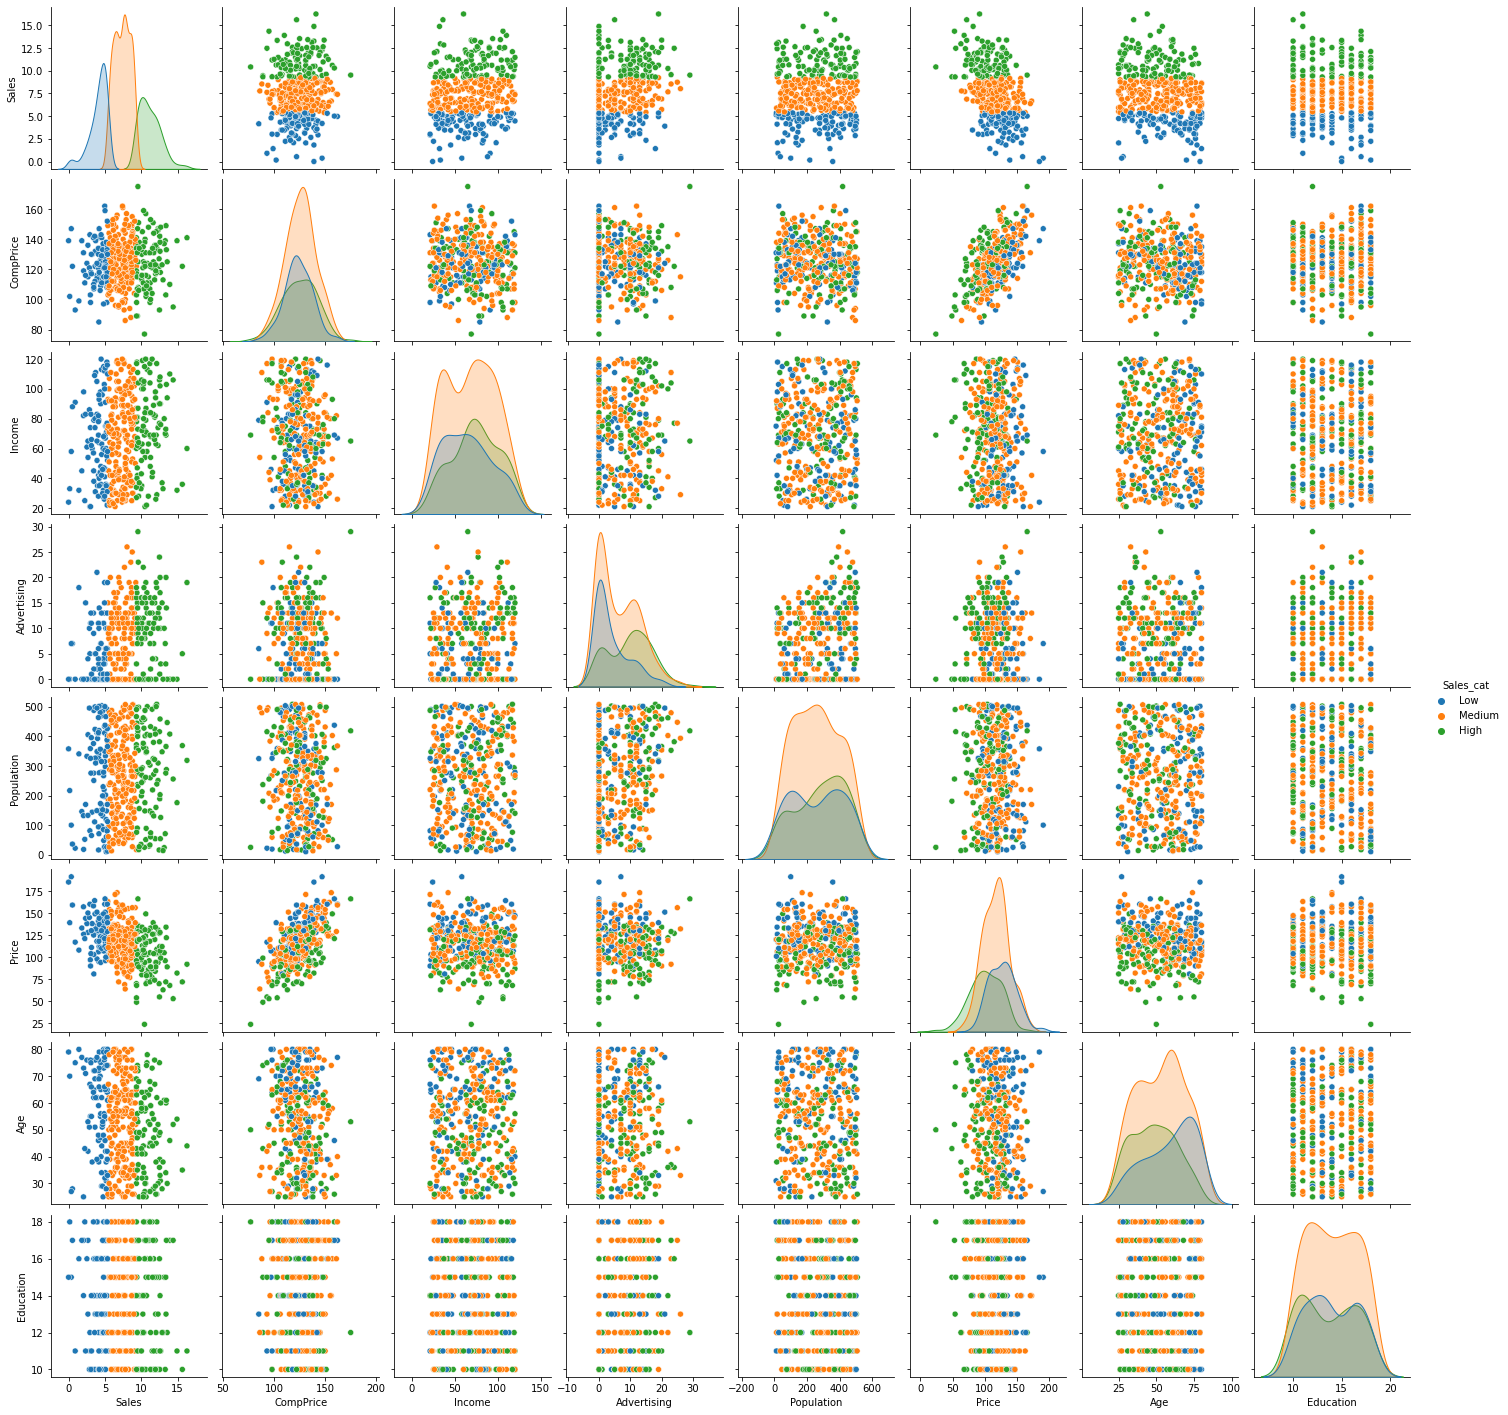

In [46]:
sns.pairplot(data=com_data_1, hue = 'Sales_cat')
plt.show()

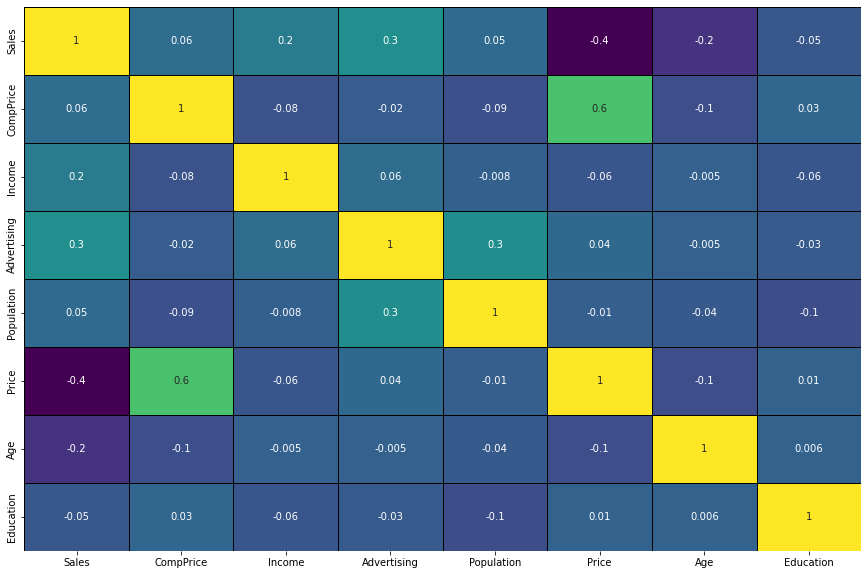

In [43]:
# Correlation matrix:

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(com_data.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')
plt.show()

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')


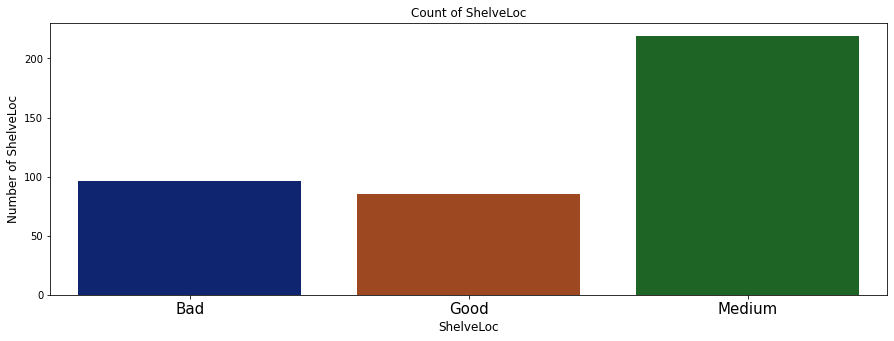

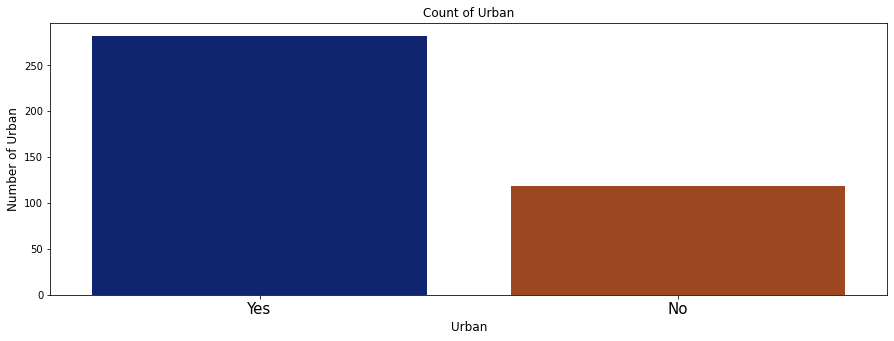

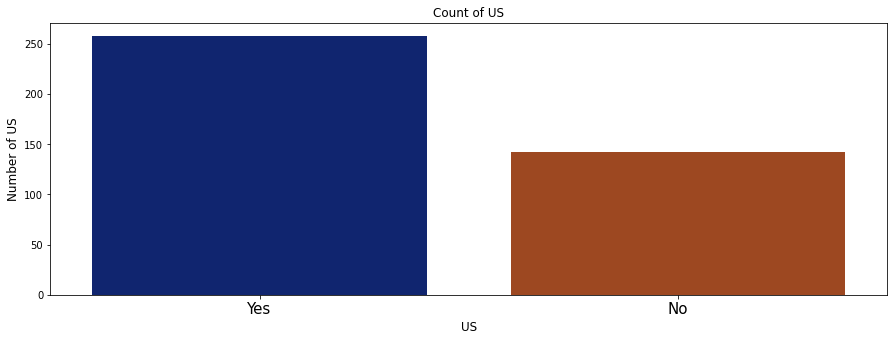

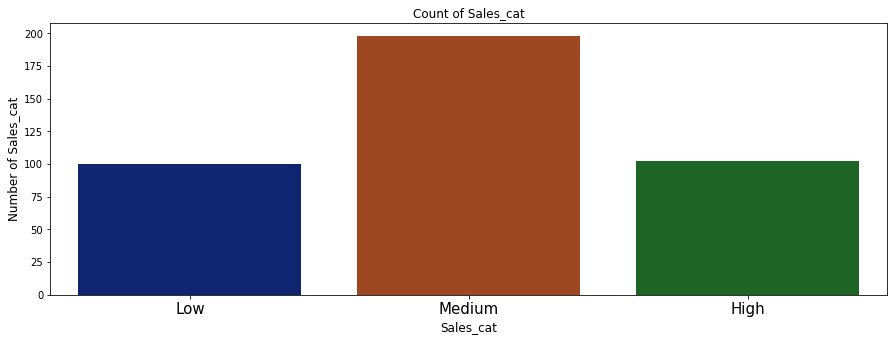

In [45]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    unique = com_data_1[column].value_counts(ascending=True);
 
 # plt.subplot(1, len(categorical_features), idx+1):
    
    plt.title("Count of "+ column)
    sns.countplot(data=com_data_1, x=column, palette = "dark")
    
 # plt.bar(unique.index, unique.values):

    plt.xticks(rotation = 0, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    plt.show()

In [48]:
data_ = com_data_1.copy()
data_.drop('Sales',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

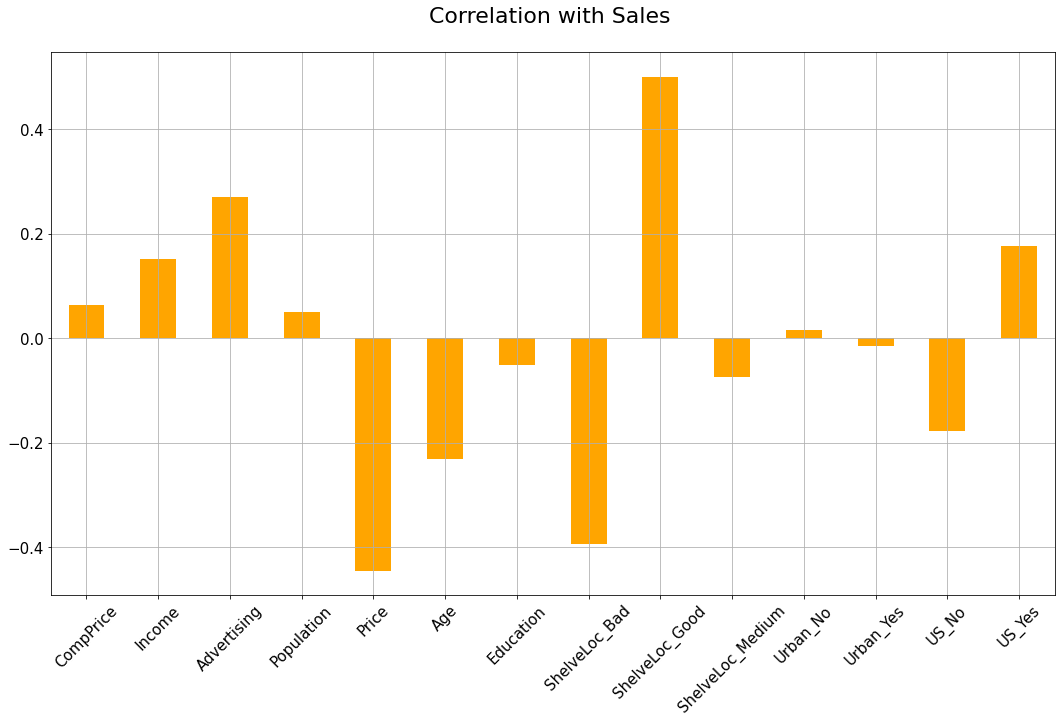

In [52]:
data2 = data_.copy()

correlations = data2.corrwith(com_data_1.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Sales \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.show()

### Checking for Imbalanced or balanced dataset with regards to the Target:

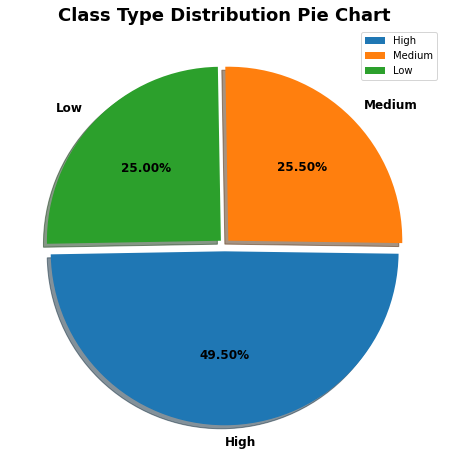

In [54]:
plt.figure(figsize = (12,8))
plt.pie(com_data_1['Sales_cat'].value_counts(),
       labels=com_data_1.Sales_cat.unique(),
       explode = [0.04,0.03,0.03],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

**Imbalanced data:** It refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

1. The class “High” is called the majority class, 
2. The much smaller in size “Low” and “Medium” class is called the minority class.

In [55]:
com_data_1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

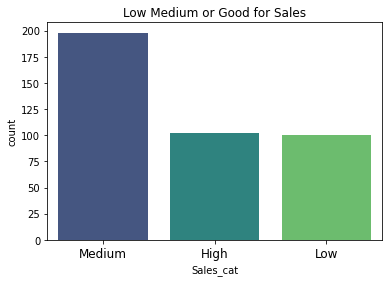

In [56]:
sns.countplot(x='Sales_cat', data=com_data_1, palette = 'viridis', 
              order=com_data_1['Sales_cat'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Low Medium or Good for Sales')
plt.show()

**Problems with imbalanced data classification:**
    
The main problem with imbalanced dataset prediction is, how accurately are we actually predicting both majority and minority class?

1. Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. 

2. In such a type of case, confusion matrix for classification problem shows how well our model classifies the target classes and we arrive at the accuracy of the model from the confusion matrix.

3. It is calculated based on the total no of correct predictions by the model divided by the total no of predictions. In the an example case it is (0+95)/(0+95+0+5)=0.95 or 95%. It means that the model fails to identify the minority class yet the accuracy score of the model will be 95%

4. Thus our traditional approach of classification and model accuracy calculation is not useful in the case of the imbalanced dataset.

# 5. Feature Selection Technique:

## 5.1. Data Pre-Processing:

In [57]:
data_ = com_data_1.copy()
data_.drop('Sales',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [58]:
data_['Sales'] = com_data_1.Sales_cat
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes   Sales  
0      0       1    High  
1      0       1    High  
2      0       1    High  
3      0       1  Medium  
4      1       0     Low

In [59]:
le = LabelEncoder()
le.fit(data_["Sales"])
data_["Sales"]=le.transform(data_["Sales"])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  Sales  
0      0       1      0  
1      0       1      0  
2      0       1      0  
3      0       1      2  
4      1       0      1

In [60]:
# Split into input (X) and output (y) variables:

X = data_.iloc[:, :-1]

y=  data_.Sales

In [61]:
# Feature importance:

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [62]:
# feature extraction:

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [63]:
# Summarize scores:

scores = fit.scores_

features = fit.transform(X)

In [64]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score           Feature
4   300.881058             Price
2   251.767458       Advertising
3   141.113336        Population
5   106.577639               Age
8    66.174919    ShelveLoc_Good
1    65.145403            Income
7    48.524460     ShelveLoc_Bad
12   13.109136             US_No
9     8.654770  ShelveLoc_Medium
13    7.215106            US_Yes
0     2.253637         CompPrice
6     0.689685         Education
10    0.163751          Urban_No
11    0.068520         Urban_Yes

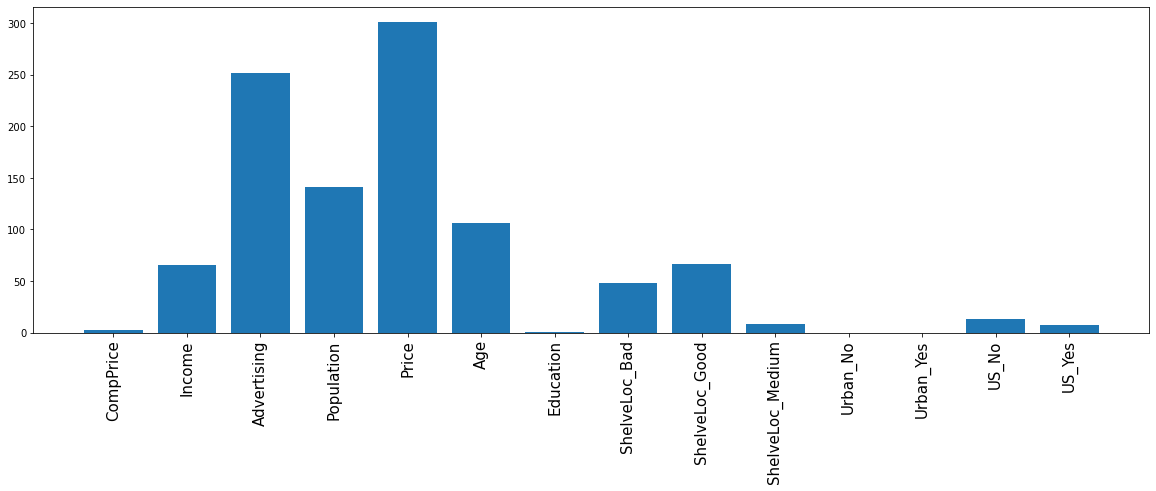

In [65]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

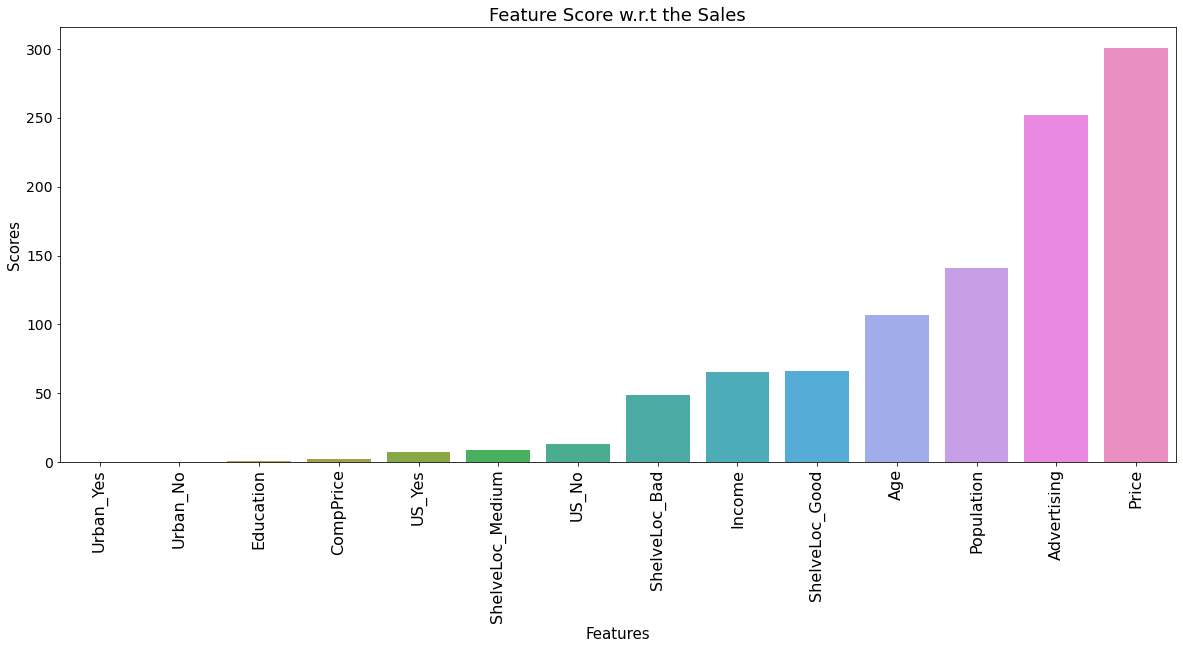

In [66]:
# Make barplot and sort bars:

plt.figure(figsize=(20,8))
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)

# Set labels:

plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [67]:
model_data = data_[['Price', 'Advertising','Population', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'ShelveLoc_Medium','Sales']]
model_data.head()

Price  Advertising  Population  Income  Age  ShelveLoc_Good  ShelveLoc_Bad  \
0    120           11         276      73   42               0              1   
1     83           16         260      48   65               1              0   
2     80           10         269      35   59               0              0   
3     97            4         466     100   55               0              0   
4    128            3         340      64   38               0              1   

   ShelveLoc_Medium  Sales  
0                 0      0  
1                 0      0  
2                 1      0  
3                 1      2  
4                 0      1

## 5.2 Test Train Split With Imbalanced Dataset:

In [68]:
x = model_data.drop('Sales',axis=1)
y = model_data['Sales']

In [69]:
y.unique()

array([0, 2, 1])

In [70]:
# Create StratifiedKFold object:

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Enumerate splits and summarize distributions:

for train_ix, test_ix in skf.split(x, y):
    
# Select rows:
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
    
# Summarize train and test composition:

counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 178, 0: 92, 1: 90}) Testing Data Counter({2: 20, 0: 10, 1: 10})


In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [72]:
# Summarize train and test composition:

counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 139, 0: 71, 1: 70}) Testing Data Counter({2: 59, 0: 31, 1: 30})


In [73]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (280, 8)
Shape of X_test:  (120, 8)
Shape of y_train:  (280,)
Shape of y_test (120,)


# 6. Stop Splitting but When???

Not sometimes but mostly real-world datasets have a large number of features, which will result in a large number of splits, which in turn gives a huge tree. Such trees take time to build and can lead to overfitting. That means the tree will give very GOOD accuracy on training dataset but will give you BAD accuracy in test data.

There are many ways to resolve this problem through hyperparameter tuning. We can set the maximum depth of our decision tree using the max_depth parameter. 
The more the value of max_depth, the more complex your tree will be. 

The training error will off-course decrease, if we increase the max_depth value but when our test data comes into the picture, we will get a very bad accuracy. Hence, we need a value that will not be overfit as well as underfit our data and for this, you can use GridSearchCV.

Another way is to set the minimum number of samples for each spilt. It is denoted by min_samples_split. Here we specify the minimum number of samples required to do a spilt. For example, we can use a minimum of 10 samples to reach a decision. That means if a node has less than 10 samples then using this parameter, we can stop the further splitting of this node and make it a leaf node.

**There are more hyperparameters such as:**

**min_samples_leaf –** It represents the minimum number of samples required to be in the leaf node. The more you increase the number, the more is the possibility of overfitting.

**max_features –** It helps us to decide what No. of features to consider when looking for the best split.

## 6.1. Grid search using Stratified Kfold Splits on Imbalanced Dataset:

In [74]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [75]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(train_X, train_y)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(train_X, train_y)
print_score(tree_clf, train_X, train_y, test_X, test_y, train=True)
print_score(tree_clf, train_X, train_y, test_X, test_y, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 64.44%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.803922   0.698113    0.601562  0.644444    0.701199   
recall      0.445652   0.411111    0.865169  0.644444    0.573977   
f1-score    0.573427   0.517483    0.709677  0.644444    0.600196   
support    92.000000  90.000000  178.000000  0.644444  360.000000   

           weighted avg  
precision      0.677414  
recall         0.644444  
f1-score       0.626809  
support      360.000000  
_______________________________________________
Confusion Matrix: 
 [[ 41   1  50]
 [  1  37  52]
 [  9  15 154]]

Test Result:
Accuracy Score: 52.50%
_______________________________________________
CLASSIFICATION REPORT:
    

In [76]:
# Get score for different values of n:

decision_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

results = cross_val_score(decision_tree, train_X, train_y, cv=skf)
print(results.mean())

0.5916666666666666


In [77]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv=skf,
                   verbose=1,
                   n_jobs=6)

grid.fit(train_X,train_y)

model = grid.best_estimator_


Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [78]:
grid.best_score_

0.6638888888888889

In [79]:
predict_output = model.predict(test_X)
accuracy_test = accuracy_score(test_y,predict_output)
accuracy_test

0.75

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.89      0.80      0.84        10
           2       0.72      0.90      0.80        20

    accuracy                           0.75        40
   macro avg       0.76      0.70      0.71        40
weighted avg       0.75      0.75      0.74        40



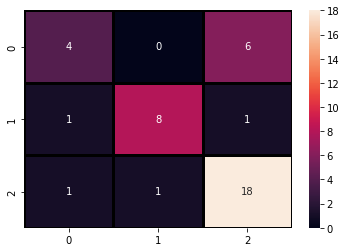

In [80]:
sns.heatmap(confusion_matrix(test_y, predict_output),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(test_y,predict_output))

## 6.2 Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset:

In [81]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 78.21%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.782609   0.800000    0.773973  0.782143    0.785527   
recall      0.760563   0.742857    0.812950  0.782143    0.772123   
f1-score    0.771429   0.770370    0.792982  0.782143    0.778260   
support    71.000000  70.000000  139.000000  0.782143  280.000000   

           weighted avg  
precision      0.782669  
recall         0.782143  
f1-score       0.781864  
support      280.000000  
_______________________________________________
Confusion Matrix: 
 [[ 54   1  16]
 [  1  52  17]
 [ 14  12 113]]

Test Result:
Accuracy Score: 60.00%
_______________________________________________
CLASSIFICATION REPORT:
    

In [82]:
# Get score for different values of n:

decision_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

results = cross_val_score(decision_tree, x_train, y_train, cv=skf)
print(results.mean())

0.6071428571428571


In [83]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv=skf,
                   verbose=1,
                   n_jobs=6)

grid.fit(x_train,y_train)

model = grid.best_estimator_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [84]:
grid.best_score_

0.6428571428571429

In [85]:
predict_output = model.predict(x_test)
accuracy_test = accuracy_score(y_test,predict_output)
accuracy_test

0.6

              precision    recall  f1-score   support

           0       0.74      0.65      0.69        31
           1       0.48      0.43      0.46        30
           2       0.59      0.66      0.62        59

    accuracy                           0.60       120
   macro avg       0.60      0.58      0.59       120
weighted avg       0.60      0.60      0.60       120



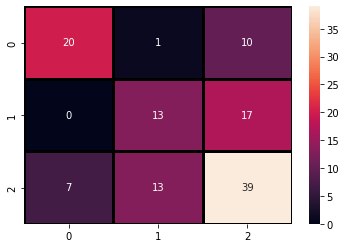

In [87]:
sns.heatmap(confusion_matrix(y_test, predict_output),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,predict_output))

**Observation:**

In both the condition, due to imbalanced dataset our results are getting biased towards the majority. 

The model is correctly classifying all the majority classes yet fails to classify the minority classes. 

Hence, we need to use some kind of oversampling techniques to balance the dataset.

# 7. Handling imbalance data using SMOTE based techniques:

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. 

There are two types of methods for this;

1. Undersampling 
2. Oversampling. 

In most cases, oversampling is preferred over undersampling techniques. 

The reason being, in undersampling we tend to remove instances from data that may be carrying some important information. 

We will covering some special data augmentation oversampling techniques: SMOTE and its related counterparts.

### SMOTE: Synthetic Minority Oversampling Technique

In this method, synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together

i) The synthetic instances generated are in the same direction i.e. connected by an artificial line its diagonal instances. This in turn complicates the decision surface generated by few classifier algorithms.

ii) SMOTE tends to create a large no. of noisy data points in feature space.

In [88]:
x = model_data.drop(['Sales'], axis=1)
y = model_data['Sales']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

In [89]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (280, 8)
Shape of X_test:  (120, 8)
Shape of y_train:  (280,)
Shape of y_test (120,)


## 7.1 SMOTE Oversampling technique:

In [90]:
counter = Counter(y_train)
print('Before',counter)

# Oversampling the train dataset using SMOTE:

smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({2: 139, 1: 139, 0: 139})


## 7.2 ADASYN: Adaptive Synthetic Sampling Approach

In [91]:
counter = Counter(y_train)
print('Before',counter)

# Oversampling the train dataset using ADASYN:

ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({1: 140, 2: 139, 0: 139})


## 7.3 Hybridization: SMOTE + Tomek Links

In [93]:
counter = Counter(y_train)
print('Before',counter)

# Oversampling the train dataset using SMOTE + Tomek:

smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({0: 128, 1: 127, 2: 118})


## 7.4 Hybridization: SMOTE + ENN

In [94]:
counter = Counter(y_train)
print('Before',counter)

# Oversampling the train dataset using SMOTE + ENN:

smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({1: 68, 0: 60, 2: 12})


## 7.5 Performance Analysis after Resampling:

In [95]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [96]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    
# Test set prediction:

    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    
# plot_confusion_matrix(clf_model, X_test, y_test) # plt.show(): 

    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    
#print('AUC-ROC'), #print('='*60), #print(roc_auc_score(y_test, y_prob[:,1], multi_class='ovo'))
#x = roc_auc_score(y_test, y_prob[:,1])

    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

In [97]:
model_params = {
    'decision_tree' :{
        'model' :  DecisionTreeClassifier(),
        'params' : {
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']
        }
        
    }
    
}

In [98]:
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with ACTUAL
Confusion Matrix
[[ 4  1 26]
 [ 1 15 14]
 [ 2 16 41]] 

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.13      0.21        31
           1       0.47      0.50      0.48        30
           2       0.51      0.69      0.59        59

    accuracy                           0.50       120
   macro avg       0.52      0.44      0.43       120
weighted avg       0.51      0.50      0.46       120
 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with SMOTE
Confusion Matrix
[[13  2 16]
 [ 0 19 11]
 [ 3 25 31]] 

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.42      0.55        31
           1       0.41      0.63      0.50        30
           2       0.53      0.53      0.53        59

    accuracy                           0.53       120
   macro avg    

In [99]:
counter = Counter(y)
print('Before',counter)

# Oversampling the train dataset using SMOTE + Tomek:

smtom = SMOTETomek(random_state=0)
x_train_smtom, y_train_smtom = smtom.fit_resample(x, y)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({2: 198, 0: 102, 1: 100})
After Counter({1: 184, 0: 178, 2: 172})


In [100]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smtom,y_train_smtom,test_size=0.3,random_state=0, stratify=y_train_smtom)

counter = Counter(y_train_smtom)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({1: 184, 0: 178, 2: 172})
After Counter({1: 129, 0: 124, 2: 120})
Shape of X_train:  (373, 8)
Shape of X_test:  (161, 8)
Shape of y_train:  (373,)
Shape of y_test (161,)


# 8. Pruning:

Here is we have another method to avoid overfitting which helps in improving the performance of the tree by cutting the nodes or sub-nodes which are not significant. 
It removes the branches which have very low importance. The performance of a tree can be further increased by pruning. 
It involves removing the branches that make use of features having low importance. 
Therefore, we will reduce the complexity of tree, and thus increasing its predictive power by reducing overfitting.

Pruning can start at either root or the leaves. The simplest method of pruning starts at leaves and removes each node with most popular class in that leaf, this change is kept if it doesn't deteriorate accuracy. 
Its also called reduced error pruning. 

More sophisticated pruning methods can be used such as cost complexity pruning where a learning parameter (alpha) is used to weigh whether nodes can be removed based on the size of the sub-tree. 
This is also known as weakest link pruning.

**Pruning:** 

Getting an Optimal Decision tree Pruning is a process of deleting the unnecessary nodes from a tree in order to get the optimal decision tree. A too-large tree increases the risk of overfitting, and a small tree may not capture all the important features of the dataset. 
Therefore, a technique that decreases the size of the learning tree without reducing accuracy is known as Pruning. 

**There are mainly two types of tree pruning technology used:**

1. Cost Complexity Pruning
2. Reduced Error Pruning.

**There are mainly 2 ways for pruning:**

**(i) Pre-pruning –** we can stop growing the tree earlier, which means we can prune/remove/cut a node if it has low importance while growing the tree.

**(ii) Post-pruning –** Once our tree is built to its depth, start pruning the nodes based on their significance.

In [101]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 6))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 6)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 72.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy   macro avg  \
precision    0.861111    0.675000    0.657143  0.723861    0.731085   
recall       0.750000    0.837209    0.575000  0.723861    0.720736   
f1-score     0.801724    0.747405    0.613333  0.723861    0.720821   
support    124.000000  129.000000  120.000000  0.723861  373.000000   

           weighted avg  
precision      0.731126  
recall         0.723861  
f1-score       0.722330  
support      373.000000  
_______________________________________________
Confusion Matrix: 
 [[ 93  15  16]
 [  1 108  20]
 [ 14  37  69]]

Test Result:
Accuracy Score: 62.73%
_______________________________________________
CLASSIFICATION REP

### We can see that this is a balanced state of training and testing accuracy are close to each other where there is no overfitting or underfitting but we can do better than this, let's try post pruning technique using Alpha Values.

## 8.1 Building Decision Tree Classifier using Entropy Criteria with Alpha values Post Pruning

### Post pruning decision trees with cost complexity pruning:

The class DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree.

In class DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. 
Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

**Information Gain:** 

It is the measurement of changes in entropy after the segmentation of a dataset based on an attribute. It calculates how much information a feature provides us about a class. According to the value of information gain, we split the node and build the decision tree. A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:

Information Gain = Entropy (S) - [(Weighted Avg) * Entropy(each feature)

**Entropy:** 

Entropy is nothing but the uncertainty in our dataset or measure of disorder.

In [102]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

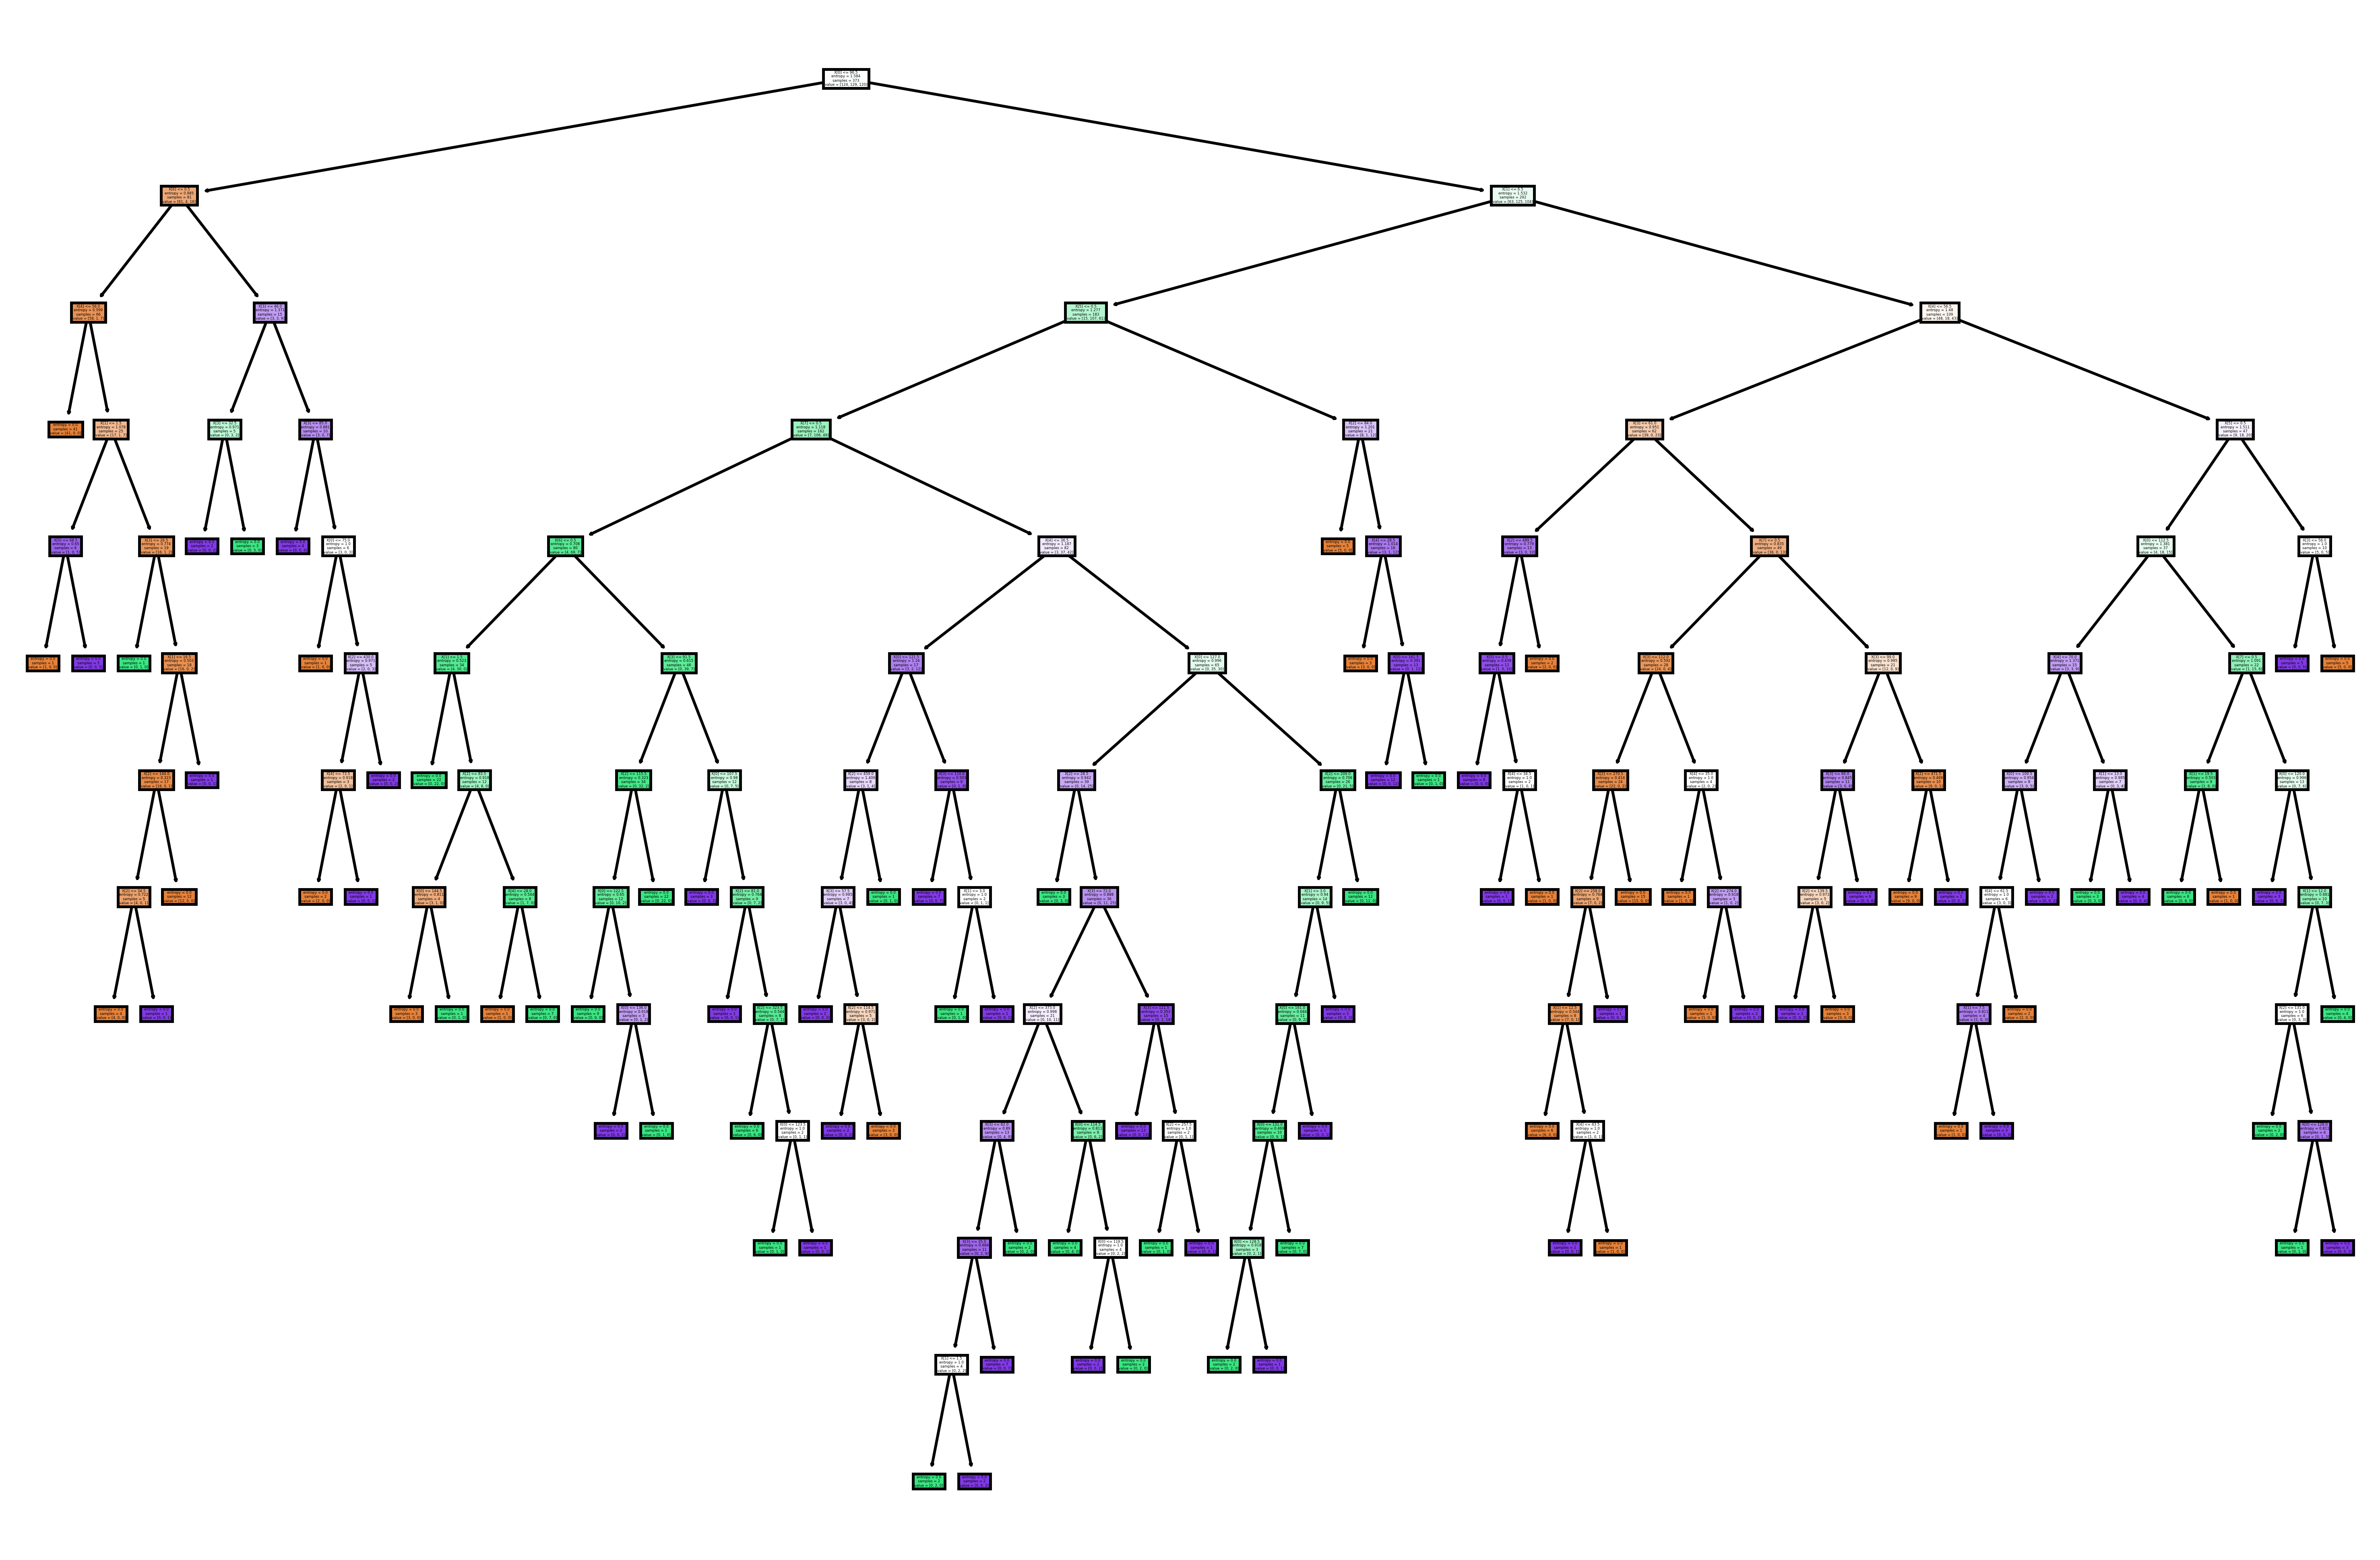

In [103]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_entropy,filled=True)
plt.show()

In [104]:
# Predicting on test data:

preds = model_entropy.predict(x_test) # Predicting on test data set: 
pd.Series(preds).value_counts()       # Getting the count of each category: 

1    56
0    53
2    52
dtype: int64

In [105]:
pd.crosstab(y_test,preds) # Getting the 2 way table to understand the correct and wrong predictions:

col_0   0   1   2
Sales            
0      36   4  14
1       5  36  14
2      12  16  24

In [106]:
# Accuracy:

np.mean(preds==y_test)

0.5962732919254659

In [107]:
# Classification Report:

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67        54
           1       0.64      0.65      0.65        55
           2       0.46      0.46      0.46        52

    accuracy                           0.60       161
   macro avg       0.59      0.59      0.59       161
weighted avg       0.60      0.60      0.60       161



In [108]:
path = model_entropy.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [109]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.17134342267896696


####  We have remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.  Here, we show that the number of nodes and tree depth decreases as alpha increases.

### 8.1.1 Accuracy vs alpha for training and testing sets:

When ccp_alpha is set to zero and keeping the other default parameters of class DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. 

As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

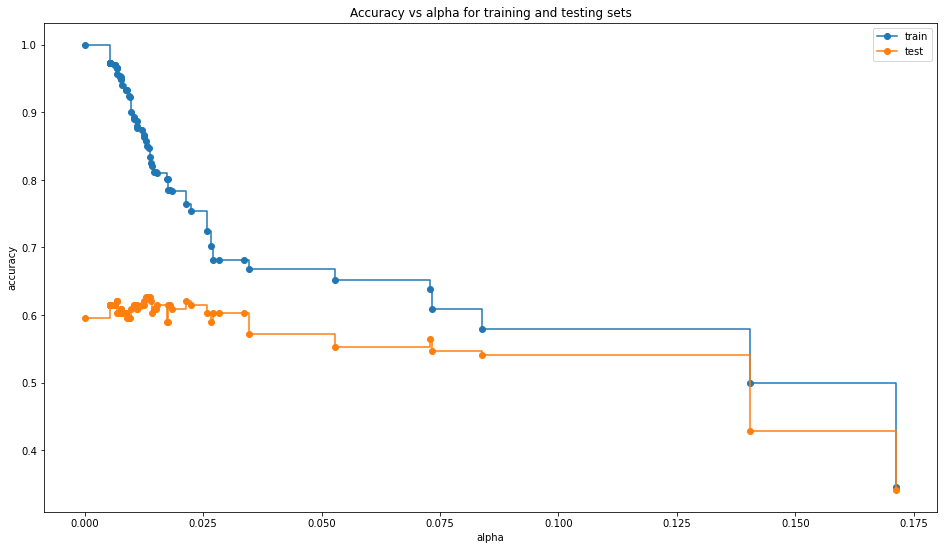

In [110]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [111]:
ccp_alphas

array([0.        , 0.00536193, 0.00536193, 0.00536193, 0.00536193,
       0.00536193, 0.00536193, 0.00536193, 0.0062868 , 0.00629629,
       0.00629629, 0.00678103, 0.00678103, 0.00678103, 0.00682348,
       0.00735505, 0.00738576, 0.00754131, 0.00759911, 0.00759911,
       0.007626  , 0.0078757 , 0.00870003, 0.00870003, 0.00884823,
       0.00924477, 0.00957582, 0.00970202, 0.0104215 , 0.01045612,
       0.01101722, 0.01107654, 0.01110792, 0.01214296, 0.01246496,
       0.01257361, 0.01301542, 0.01308468, 0.01363583, 0.01386342,
       0.01402853, 0.01420129, 0.01452909, 0.01493168, 0.01515274,
       0.01733081, 0.01748145, 0.01750441, 0.01808973, 0.01848954,
       0.02133578, 0.02237881, 0.02581192, 0.02674447, 0.02698787,
       0.02827313, 0.03366643, 0.0345913 , 0.05274258, 0.07284724,
       0.07322999, 0.08375109, 0.1403961 , 0.17134342])

In [112]:
# Choosing best value of cc_alpha where testing and training accuracy are almost same or near or closer to each other:

In [113]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=0.03366643)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03366643, criterion='entropy',
                       random_state=0)

In [114]:
pred_test=clf.predict(x_test)
pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 0.6809651474530831 
Testing Accuracy 0.6024844720496895


              precision    recall  f1-score   support

           0       0.64      0.76      0.69        54
           1       0.70      0.64      0.67        55
           2       0.45      0.40      0.42        52

    accuracy                           0.60       161
   macro avg       0.60      0.60      0.60       161
weighted avg       0.60      0.60      0.60       161



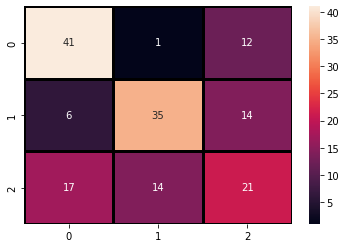

In [115]:
sns.heatmap(confusion_matrix(y_test, pred_test),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,pred_test))

### Let’s get familiar with some of the terminologies:

**Root Nodes:** It is the node present at the beginning of a decision tree, from this node population starts dividing according to various features.

**Decision Nodes:** The nodes we get after splitting the root nodes.

**Leaf Nodes:** Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.

**Branch/Sub-tree:** A sub-section of this decision tree is called sub-tree.

**Pruning:** It is nothing but the cutting down some nodes to stop overfitting.

**Splitting:** It is the process of dividing decision node/root node into sub-nodes according to the given conditions.

**Pruning:** It is the process of removing the unwanted branches from the tree.

**Parent/Child node:** The root node of the tree is called parent node, and other nodes are called child nodes.

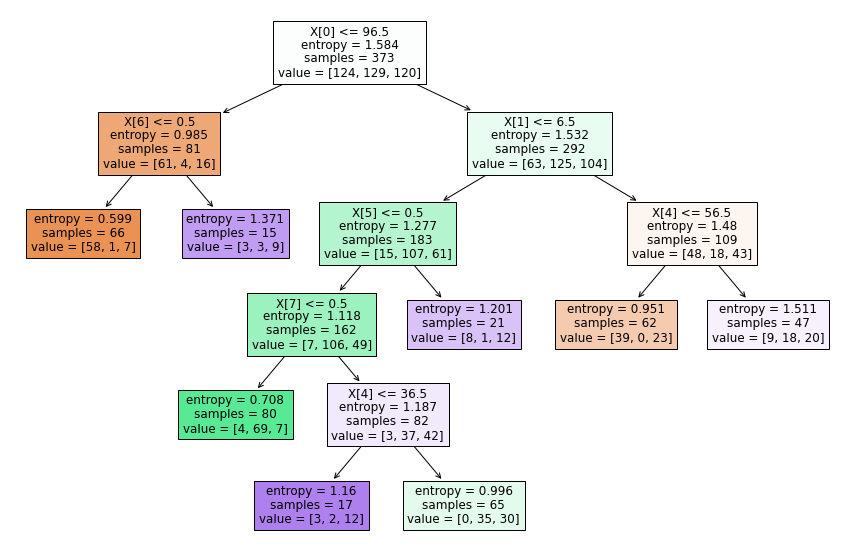

In [116]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

## 8.2 Building Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning:

### Post pruning decision trees with cost complexity pruning:

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. 
Cost complexity pruning provides another option to control the size of a tree. 

DecisionTreeClassifier pruning technique is parameterized by the cost complexity parameter, ccp_alpha. 
Greater values of ccp_alpha increase the number of nodes pruned. Here, we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

See also minimal_cost_complexity_pruning for details on pruning.

**Gini Index:**

It is a measure of impurity or purity used while creating a decision tree in the CART (Classification and Regression Tree) algorithm.

An attribute with the low Gini index should be preferred as compared to the high Gini index.
It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.

**Gini index can be calculated using the below formula:**

Gini Index= 1- ∑jPj2

In [117]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

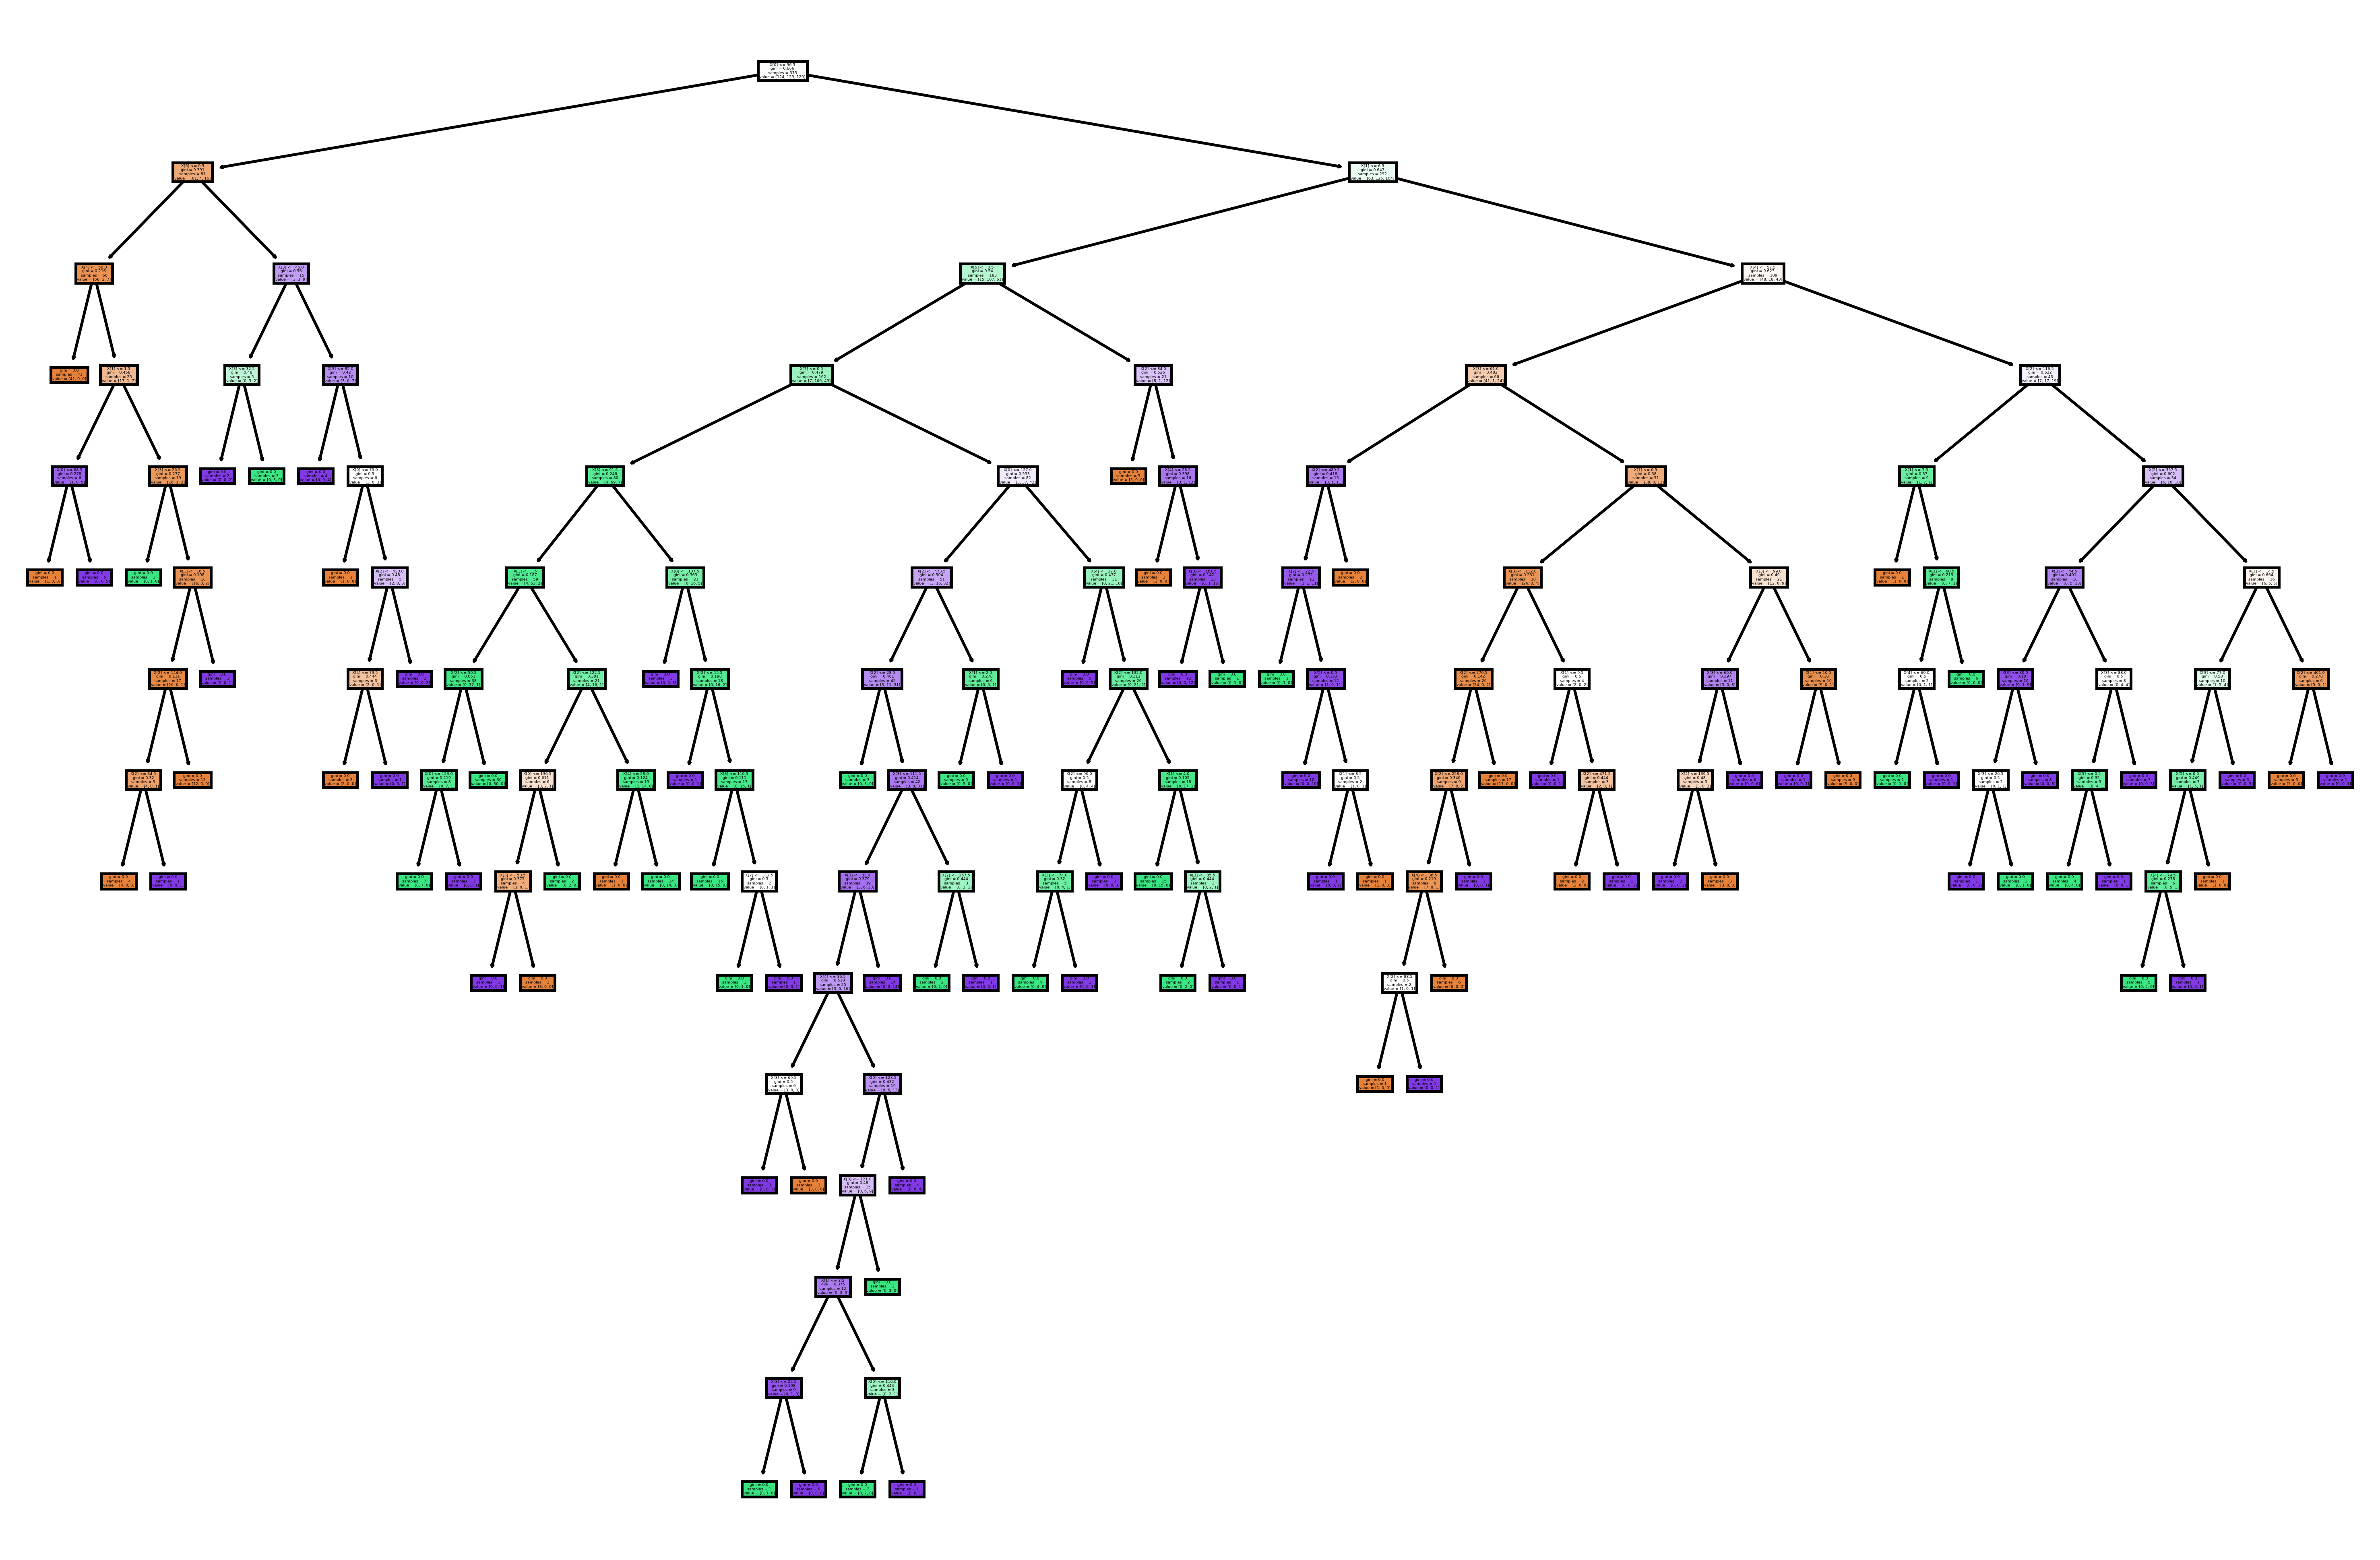

In [118]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_gini,filled=True)
plt.show()

In [119]:
# Predicting on test data:

preds = model_gini.predict(x_test) # Predicting on test data set: 
pd.Series(preds).value_counts()    # Getting the count of each category: 

2    60
0    51
1    50
dtype: int64

In [120]:
pd.crosstab(y_test,preds) # Getting 02 way table to understand the correct and wrong predictions:

col_0   0   1   2
Sales            
0      37   2  15
1       4  37  14
2      10  11  31

In [121]:
# Accuracy:

np.mean(preds==y_test)

0.6521739130434783

In [122]:
# Classification Report:

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.73      0.69      0.70        54
           1       0.74      0.67      0.70        55
           2       0.52      0.60      0.55        52

    accuracy                           0.65       161
   macro avg       0.66      0.65      0.65       161
weighted avg       0.66      0.65      0.66       161



In [123]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [124]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0777420178643562


### 8.2.1 Accuracy vs alpha for training and testing sets:

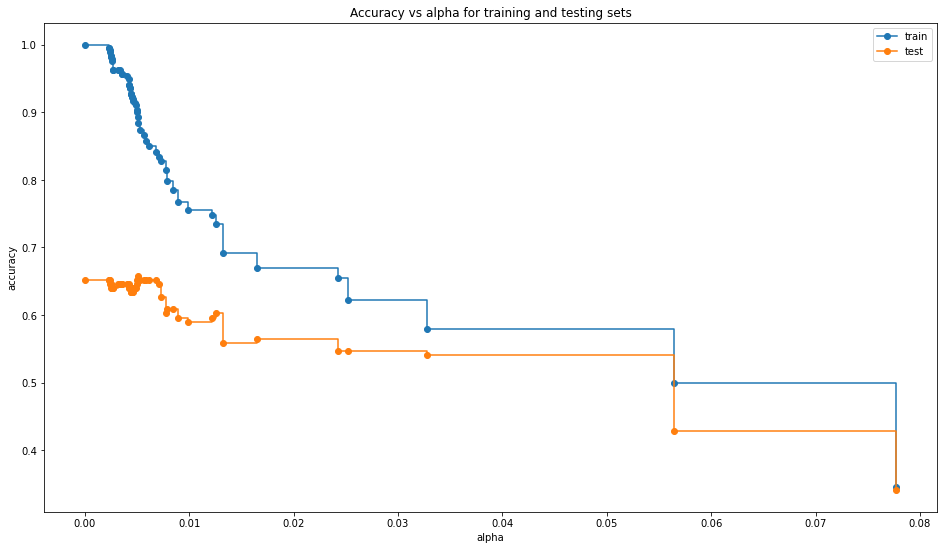

In [125]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [126]:
ccp_alphas

array([0.        , 0.00234584, 0.00234584, 0.00241287, 0.00245755,
       0.00252326, 0.00252326, 0.00253202, 0.00260363, 0.00261041,
       0.00268097, 0.00268097, 0.00321716, 0.00332715, 0.00357462,
       0.00357462, 0.00402145, 0.00421295, 0.00424486, 0.00424486,
       0.00428954, 0.00428954, 0.00446828, 0.00446828, 0.00446828,
       0.0044858 , 0.0044858 , 0.00457139, 0.00457802, 0.00482574,
       0.00494947, 0.0049739 , 0.00500447, 0.00512362, 0.00512673,
       0.00525274, 0.00563003, 0.00584938, 0.00615018, 0.00679437,
       0.00712371, 0.00731422, 0.00775027, 0.00788275, 0.0084123 ,
       0.00895157, 0.00984303, 0.01214168, 0.01252713, 0.01324466,
       0.01648435, 0.02421173, 0.02518644, 0.03279996, 0.05644837,
       0.07774202])

In [127]:
# Choosing best value of cc_alpha where testing and training accuracy are almost same or near or closer to each other:

In [128]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=0.02518644)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02518644, random_state=0)

In [129]:
pred_test=clf.predict(x_test)
pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 0.6219839142091153 
Testing Accuracy 0.546583850931677


              precision    recall  f1-score   support

           0       0.51      0.93      0.66        54
           1       0.83      0.35      0.49        55
           2       0.47      0.37      0.41        52

    accuracy                           0.55       161
   macro avg       0.60      0.55      0.52       161
weighted avg       0.61      0.55      0.52       161



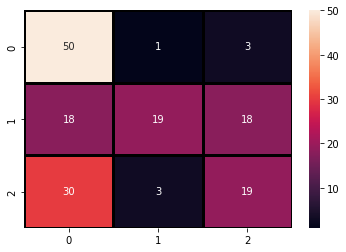

In [130]:
sns.heatmap(confusion_matrix(y_test, pred_test),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,pred_test))

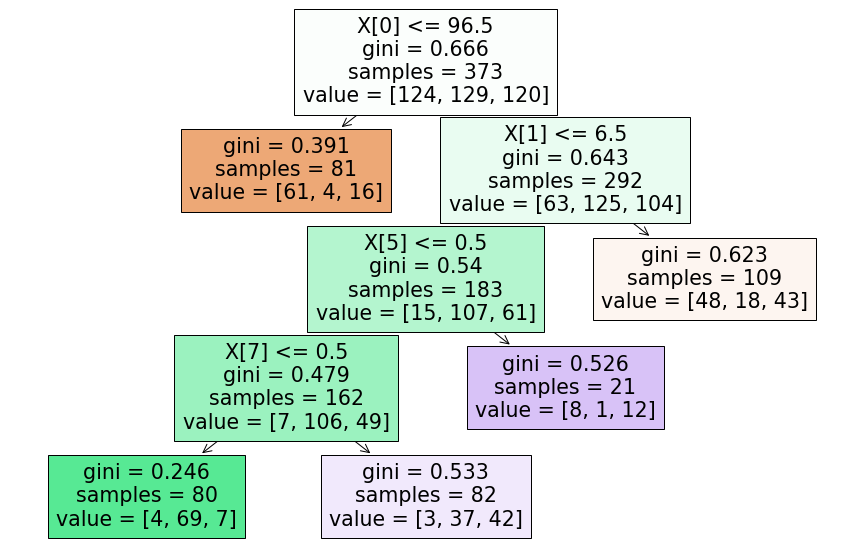

In [131]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

### **Advantages of CART:**
    
1. It is simple to understand, interpret, visualize.
2. Decision trees implicitly perform variable screening or feature selection.
3. It can handle both numerical and categorical data. 
4. It can also handle multi-output problems.
5. Decision trees require relatively little effort from the users for data preparation.
6. Non-Linear relationships between parameters do not affect the tree performance.
7. It can be very useful for solving decision-related problems.
8. It helps to think about all the possible outcomes for a problem.

### **Disadvantages of CART:**

1. It can create over-complex trees that do not generalize the data well. This is called overfitting.
2. DT can be unstable because small variations in the data might result in a completely different tree being generated. This is called variance, which needs to be lowered by methods like bagging and boosting.
3. Greedy algorithms can not guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees, where the features and samples are randomly sampled with replacement.
4. It can create the biased trees, if some classes dominate. It is therefore recommended to balance the dataset prior to the fitting with the decision tree.
5. It may have an overfitting issue, which can be resolved using the Random Forest algorithm.
6. For more class labels, the computational complexity of the decision tree may increase.

# ========================The End=========================